<a href="https://colab.research.google.com/github/farahqotrunnada/DTI/blob/main/Classification/Bank_Marketing_Analysis_with_Supervised_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Here is bank marketing analysis with supervised classification using the dataset from https://www.kaggle.com/janiobachmann/bank-marketing-dataset

Firstly, analysing without knowing is useless, so here are the description of the attributes
 - Input variables:

    **Bank client data:**
1. Age: (numeric)
2. Job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. Marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. Education: (categorical: primary, secondary, tertiary and unknown)
5. Default: has credit in default? (categorical: 'no','yes','unknown')
6. Housing: has housing loan? (categorical: 'no','yes','unknown')
7. Loan: has personal loan? (categorical: 'no','yes','unknown')
8. Balance: Balance of the individual.

   **Related with the last contact of the current campaign:**
8. Contact: contact communication type (categorical: 'cellular','telephone')
9. Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. Day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. Duration: last contact duration, in seconds (numeric)

   **Other attributes:**
12. Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. Previous: number of contacts performed before this campaign and for this client (numeric)
15. Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


 - Output variable (desired target):

  y - has the client subscribed a term deposit? (binary: 'yes','no')

# Descriptive Statistics 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/farahqotrunnada/DTI/main/Classification/bank.csv', sep = ',')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Exploratory Data Analysis

In [ ]:
%pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

**All kinds visualizing in only one line code**

Shape of your Data Set: (11162, 17)
Classifying variables in data set...
    16 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Total Number of Scatter Plots = 28
Number of Cat and Continuous Vars exceeds 30, hence no Pivot or Bar Charts
Time to run AutoViz (in seconds) = 23.506


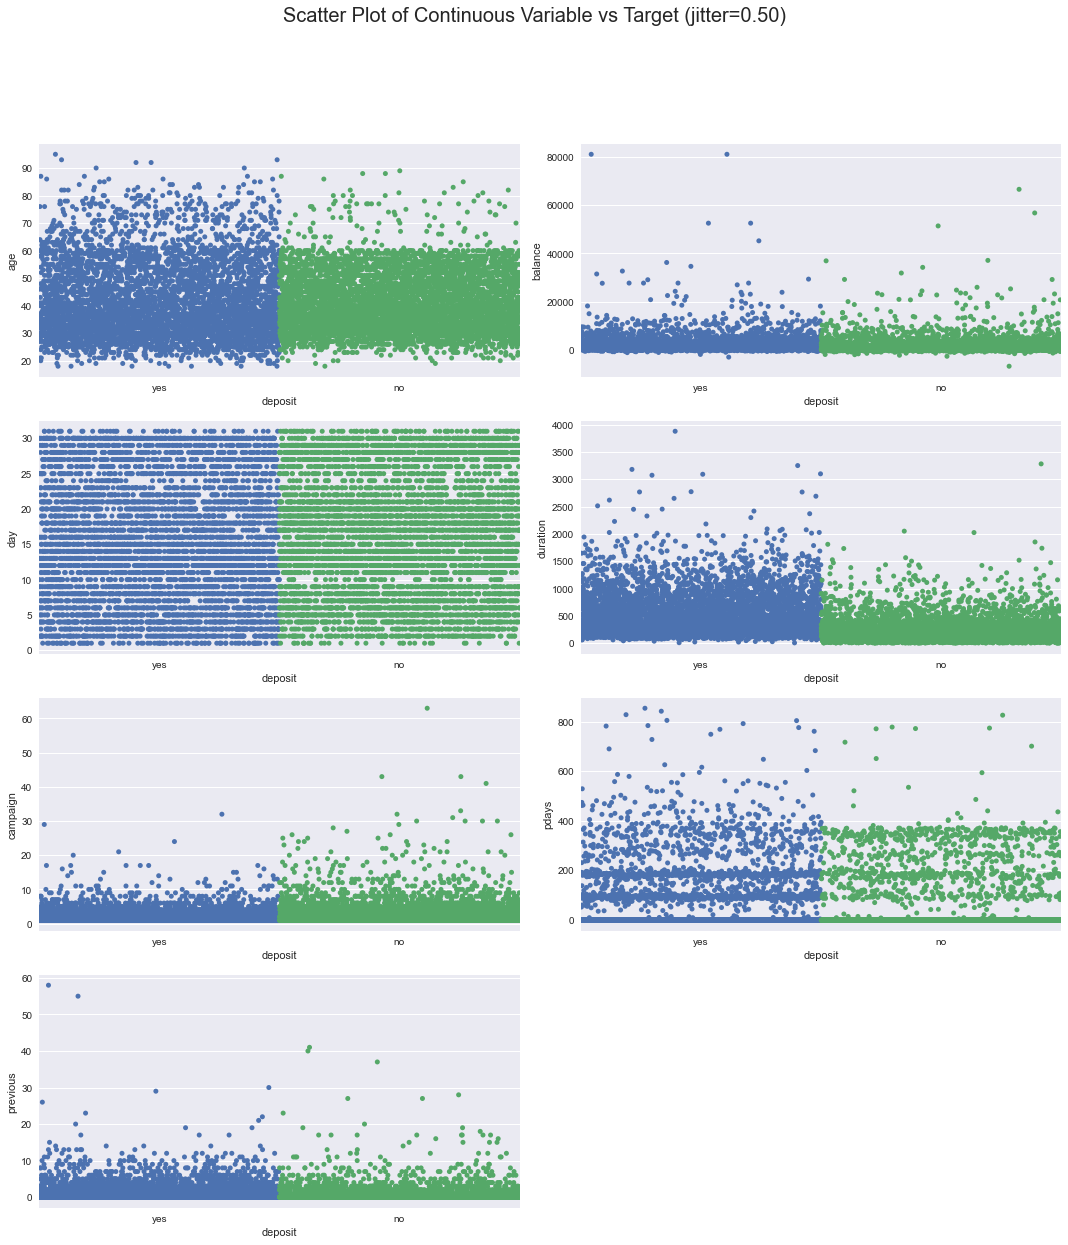

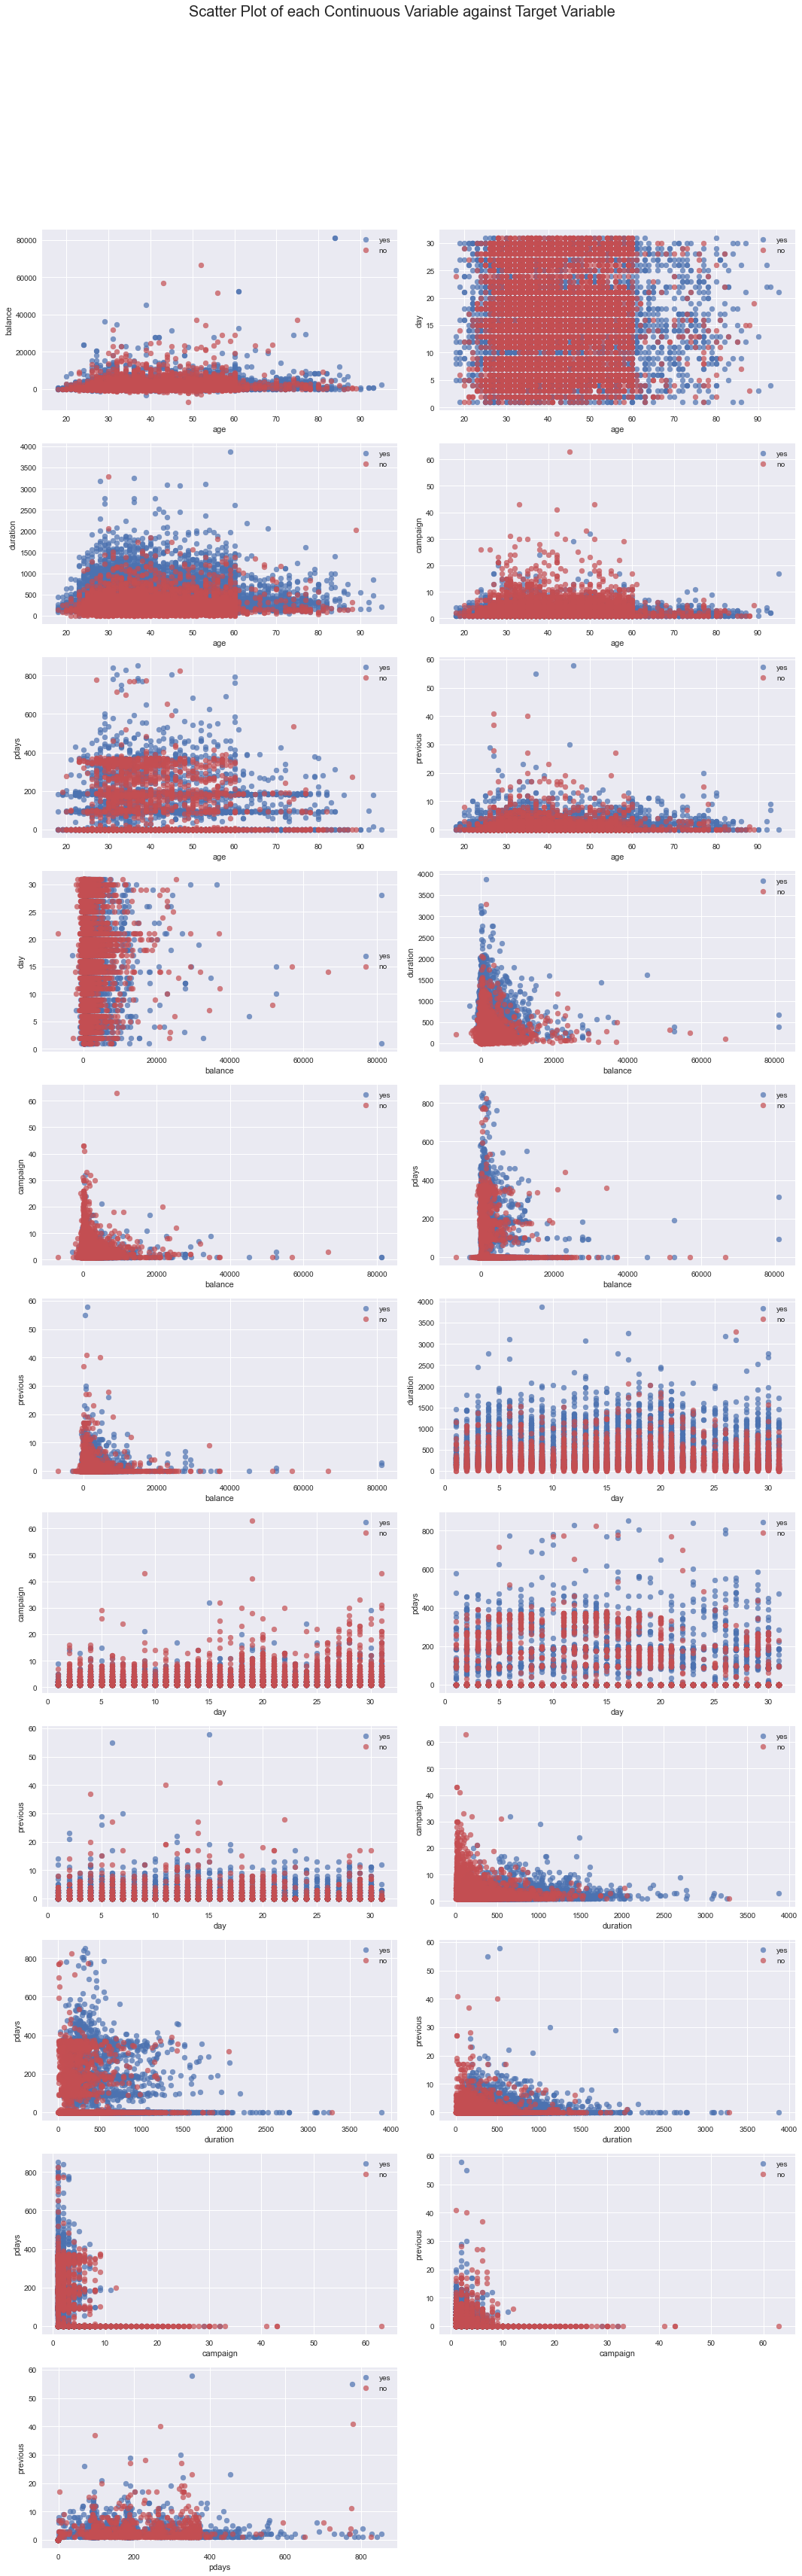

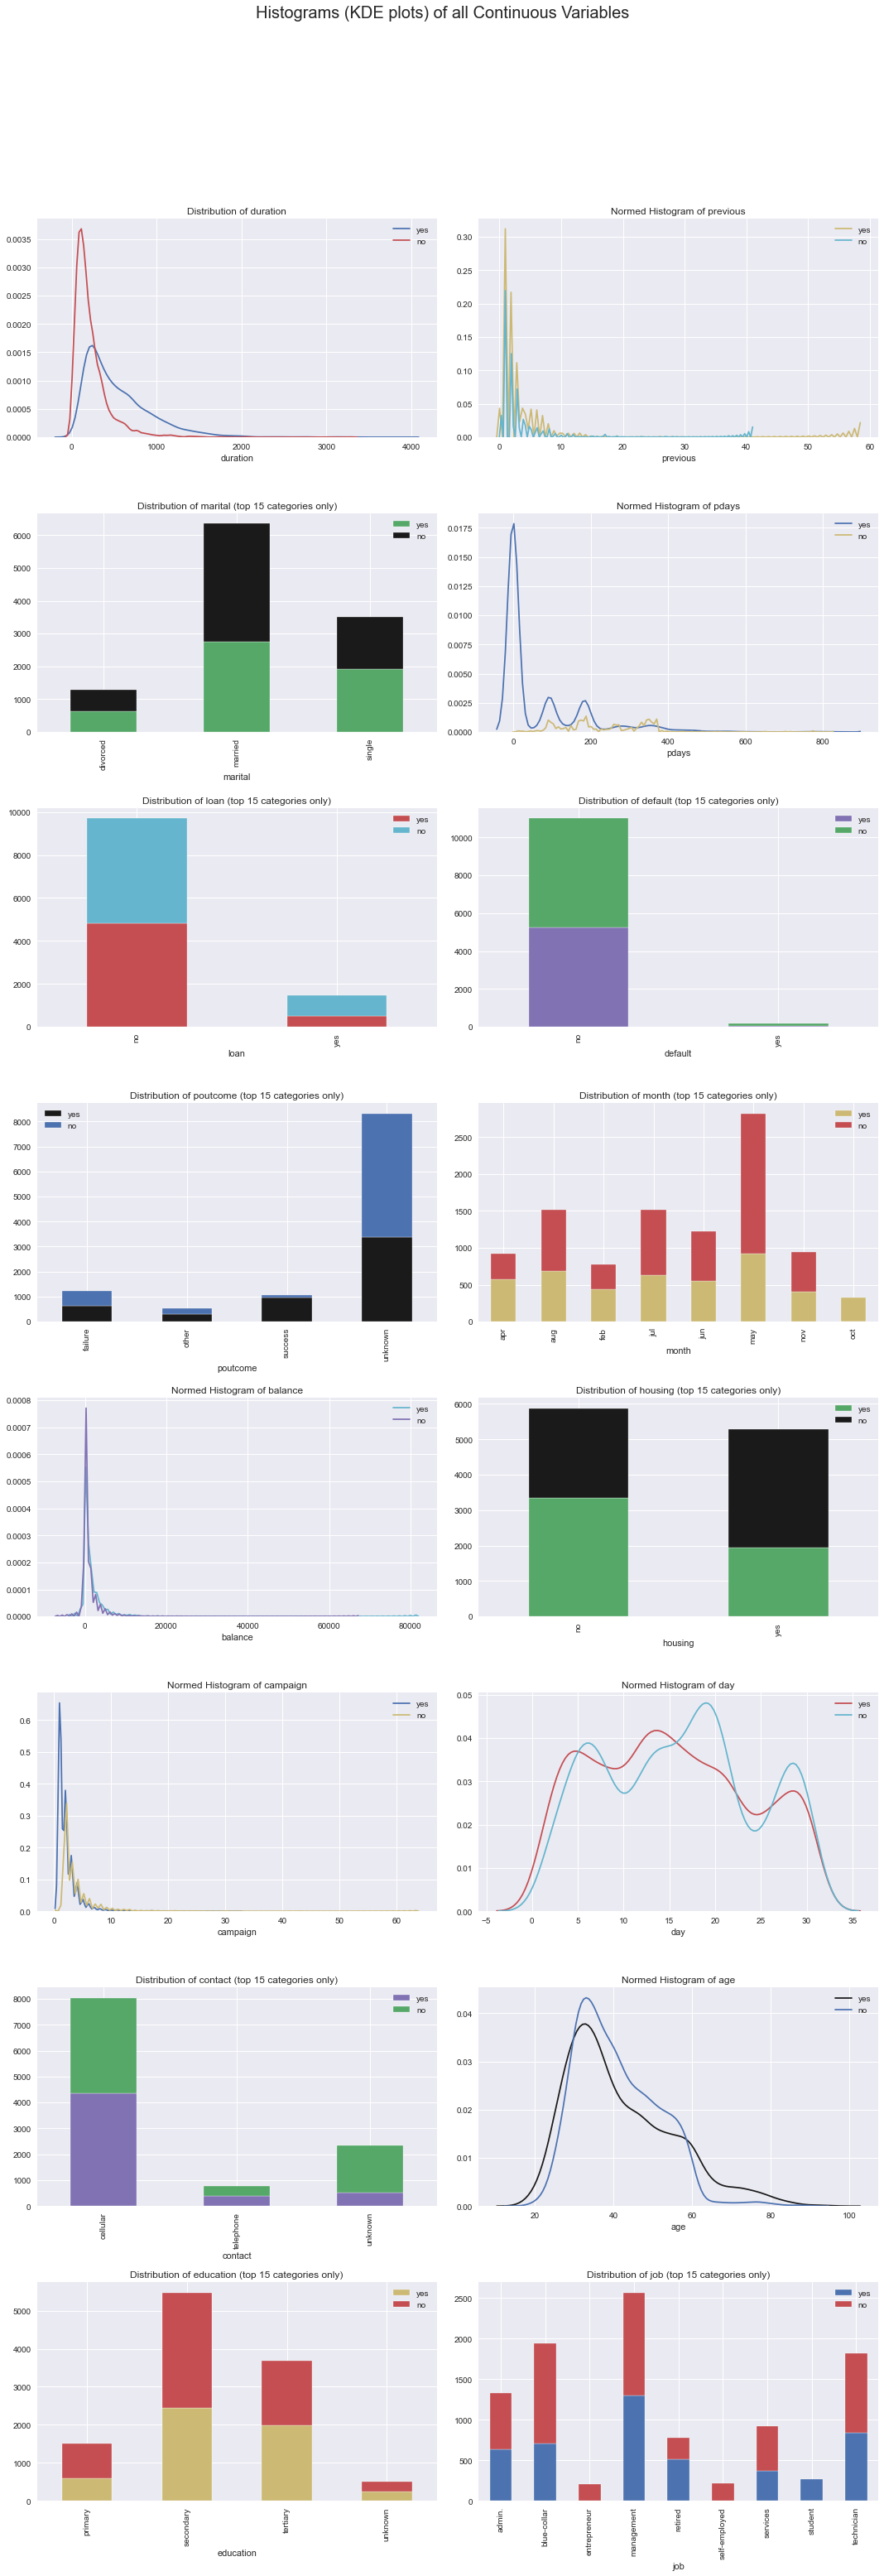

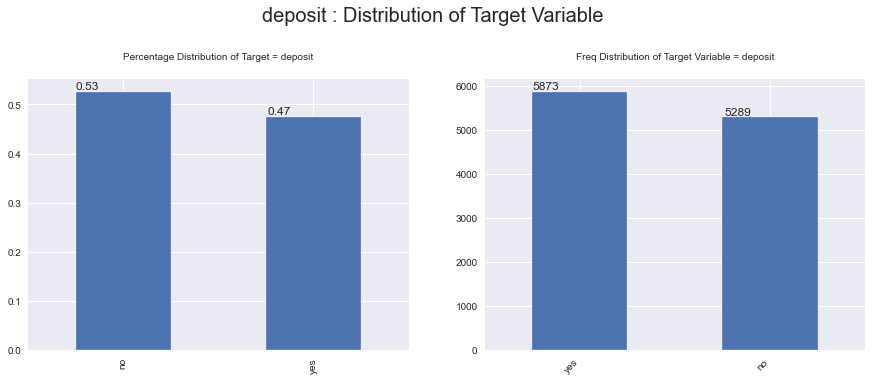

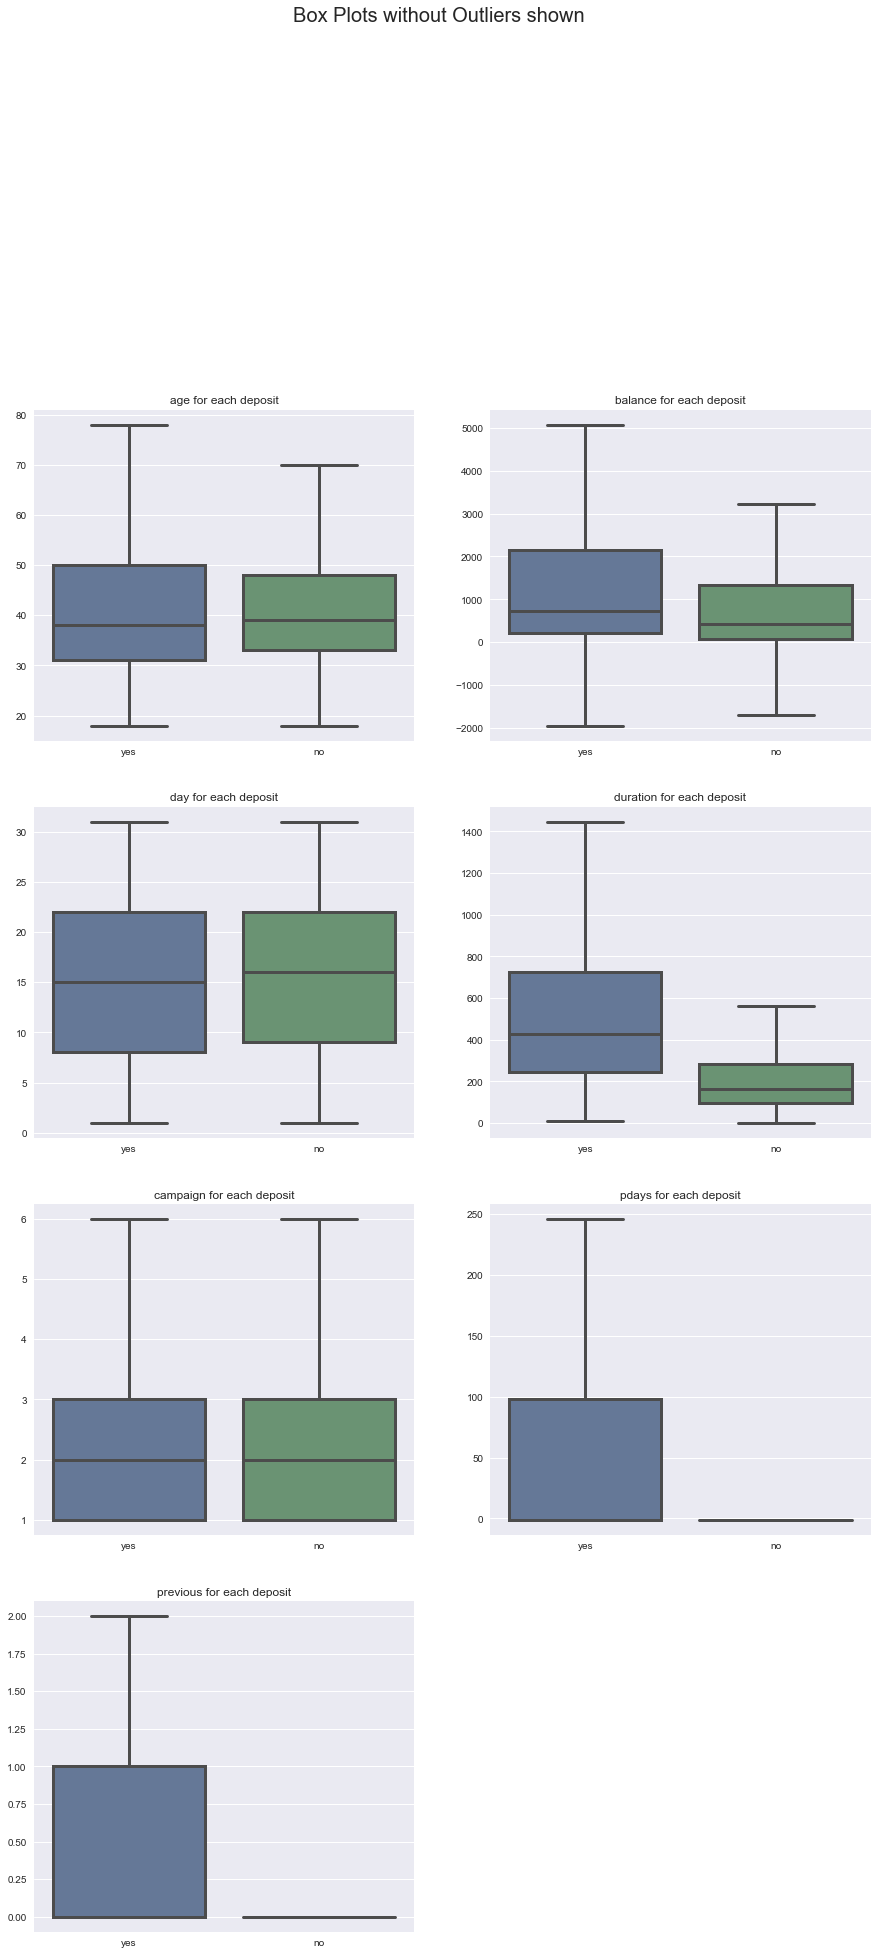

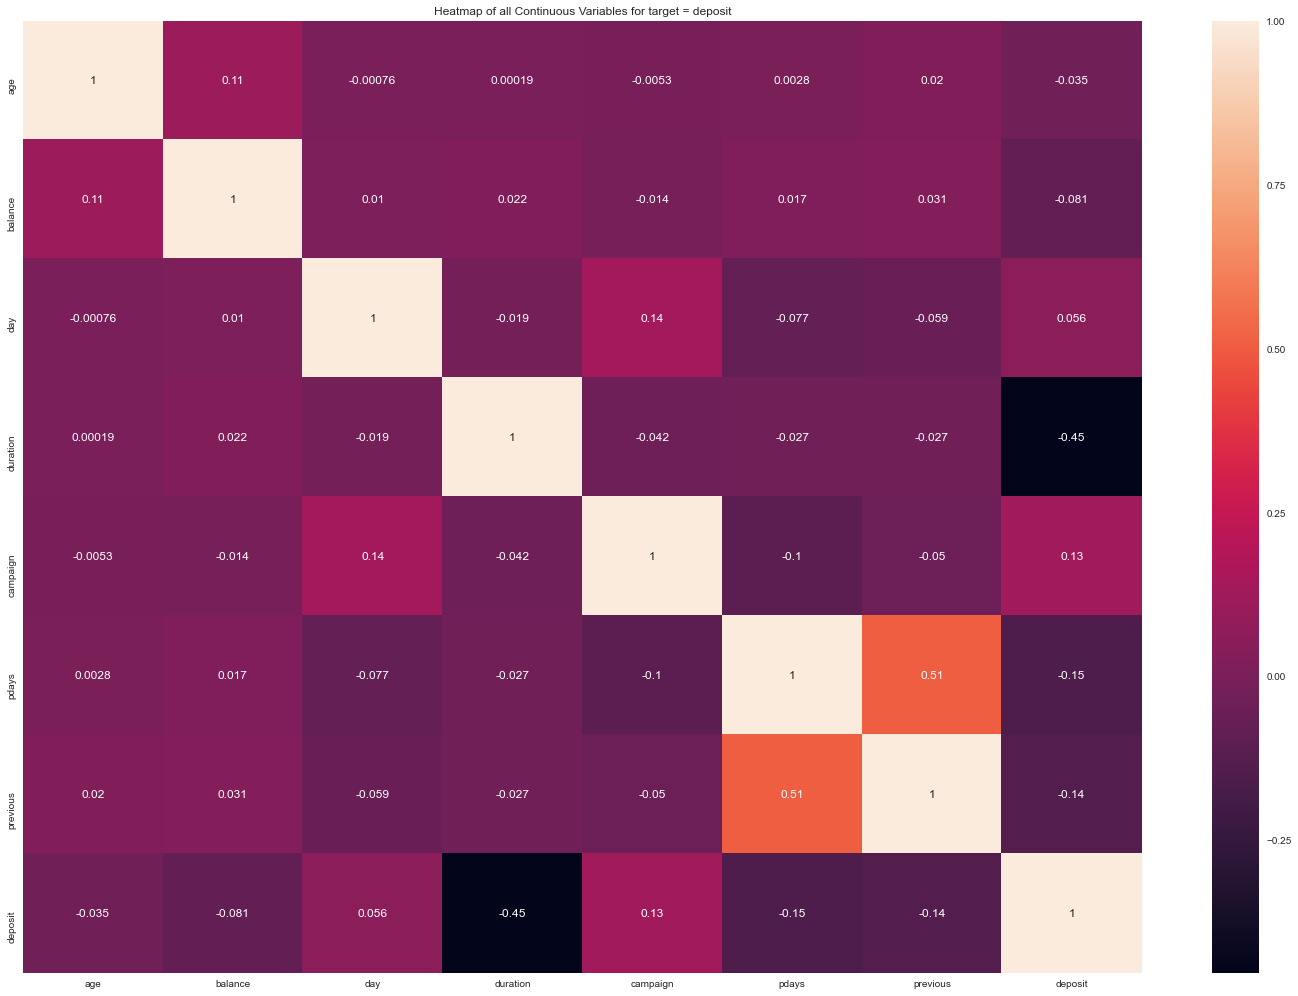

In [ ]:
visualize= AV.AutoViz('https://raw.githubusercontent.com/farahqotrunnada/DTI/main/Classification/bank.csv', depVar="deposit")

*We can see that numerical columns have outliers (especially 'pdays', 'campaign' and 'previous' columns). Possibly there are incorrect values (noisy data), so we should look closer at the data and decide how do we manage the noise.
Let's look closer at the values of 'campaign', 'pdays' and 'previous' columns:*

In [ ]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508421,0.832557
std,108.758282,2.722077,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,63.000000,58.000000


In [ ]:
#Percentage of 'pdays' values above 400:
len (df[df['pdays'] > 400] ) / len(df) * 100

1.2005017022039062

### Insight that can be gained

- 'pdays' holds the number of days that passed by after the client was last contacted from a previous campaign Looking closer into 'pdays' data we can see that:

 - Only 1.2% of values above 400. They are possibly outliers, so we should consider imputing something (possibly mean value) instead of these values.
 - -1 possibly means that the client wasn't contacted before or stands for missing data.
 
 Since we are not sure exactly what -1 means I suggest to drop this column, because -1 makes more than 50% of the values of the column.
 

- Meanwhile, i will keep 'campaign' and 'previous' because there is no weird value and the outlier will keep the real variation of data


- Furthermore, regarding the diagrams we can tell that according to our dataset:
    1. Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.
    2. Married customers are less likely to subscribe for term deposit.
    3. Customers with 'cellular' type of contact are less likely to subscribe for term deposit.
    4. People who subscribed for term deposit tend to have greater balance and age values.
    5. People who subscribed for term deposit tend to have fewer number of contacts during this campaign.


- There is no categorical variable that is likely to have such ordinal effect for term deposit. Therefore, it will be used one hot encoding for all categorical variable (except yes/no variable and of course target variable), not labeling encoding


- From plot distibutin target data, we obtain the distribution is 0.53 vs 0.47, therefore, we don't necessary need to normalize the target column (deposit) because they are slightly equal


- From correlation matrix, it seems no feature is heavily correlated with other features

# Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


*Comment : Fortunately, there is no missing value*

In [9]:
#Display table with max columns
def display_():     
    pd.set_option("display.max_columns", None)     
    from IPython.core.display import display     

**From insight of explanatory data analysis**

In [10]:
#drop irrelevant columns 
cleaned_df = df.drop(columns = ['pdays'])

In [11]:
# label 0/1 encoding for yes/no feature
cols = cleaned_df.columns
col=['deposit','default','loan','housing',]
join_cols = list(set(cols) - set(col))

from sklearn.preprocessing import LabelEncoder
data1 = cleaned_df[col].apply(LabelEncoder().fit_transform)
dataf = data1.join(df[join_cols])

# One hot encoding 
d = pd.get_dummies(dataf)

display_()
display(d.head())

,deposit,default,loan,housing,balance,age,day,previous,campaign,duration,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown
0,1,0,0,1,2343,59,5,0,1,1042,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,45,56,5,0,1,1467,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,1270,41,5,0,1,1389,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,0,0,1,2476,55,5,0,1,579,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,184,54,5,0,2,673,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Modelling

In [12]:
#Split feature and target

feature=d.drop(['deposit'], axis=1)
target = d['deposit']

In [13]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(feature , target, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7813, 47)
(3349, 47)
(7813,)
(3349,)


Processing several models

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
mplc=MLPClassifier(alpha=1)
log_reg = LogisticRegression()
svm = SVC(kernel='rbf', probability=True)
dec_tree = DecisionTreeClassifier(min_impurity_decrease=0.01)
gau_nb = GaussianNB(var_smoothing=0.0001)
rfc = RandomForestClassifier(n_estimators=150)
knn = KNeighborsClassifier(n_neighbors=5)
grad_bos = GradientBoostingClassifier()

In [14]:
mplc.fit(X_train, y_train)
svm.fit(X_train, y_train)
rfc.fit(X_train, y_train)
knn.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
gau_nb.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
grad_bos.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
%pip install graphviz

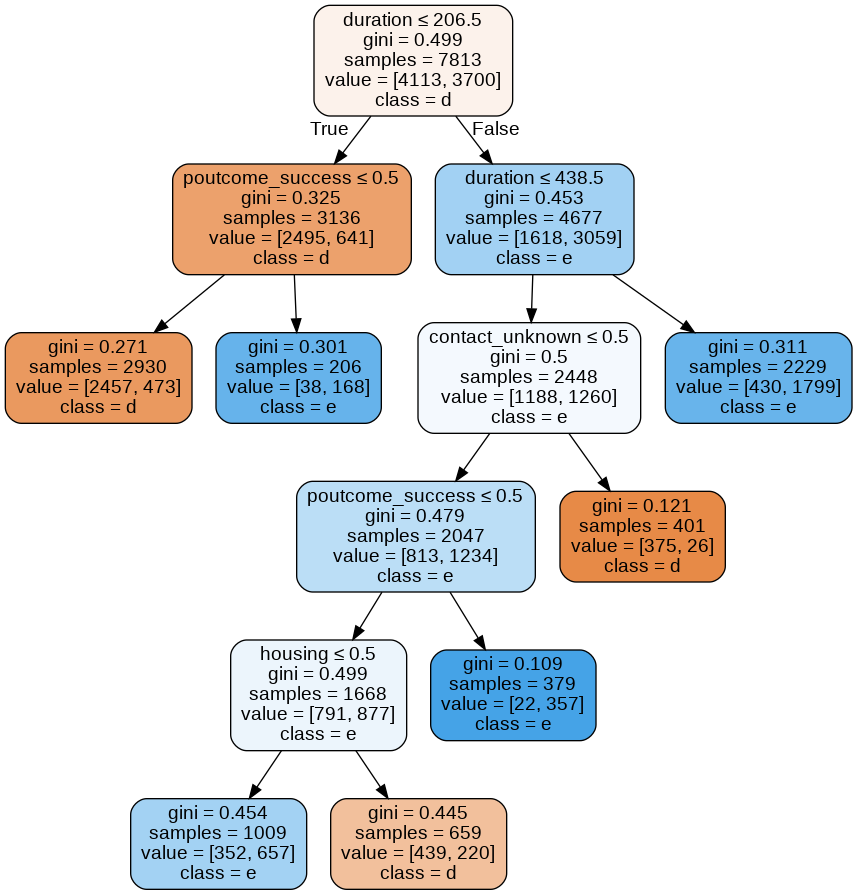

In [16]:
# Visualize Tree

from six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dec_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names='deposit',
                feature_names=feature.columns.values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# Cross-Validation for avoiding overfitting

from sklearn.model_selection import cross_val_score

cv = 3
print(f'CV Score of mplc : {cross_val_score(mplc, X_train, y_train, cv=cv, n_jobs=-1).mean()}')
print(f'CV Score of SVM : {cross_val_score(svm, X_train, y_train, cv=cv, n_jobs=-1).mean()}')
print(f'CV Score of RFC: {cross_val_score(rfc, X_train, y_train, cv=cv, n_jobs=-1).mean()}')
print(f'CV Score of KNN : {cross_val_score(knn, X_train, y_train, cv=cv, n_jobs=-1).mean()}')
print(f'CV Score of Decision Tree : {cross_val_score(dec_tree, X_train, y_train, cv=cv, n_jobs=-1).mean()}')
print(f'CV Score of Gaussian Nb : {cross_val_score(gau_nb, X_train, y_train,cv=cv, n_jobs=-1).mean()}')
print(f'CV Score of LogReg : {cross_val_score(log_reg, X_train, y_train, cv=cv, n_jobs=-1).mean()}')
print(f'CV Score of Grad_Bos : {cross_val_score(grad_bos, X_train, y_train, cv=cv, n_jobs=-1).mean()}')

CV Score of mplc : 0.6956247733444192
CV Score of SVM : 0.7170110848706601
CV Score of RFC: 0.8501224062984943
CV Score of KNN : 0.7031873302847237
CV Score of Decision Tree : 0.7852329650825101
CV Score of Gaussian Nb : 0.6875731808831927
CV Score of LogReg : 0.806732100720089
CV Score of Grad_Bos : 0.8446176117651568


**Model Evaluation**

In [ ]:
from sklearn.metrics import precision_score, recall_score, cohen_kappa_score,classification_report, f1_score, accuracy_score,confusion_matrix
y_pred_mplc = mplc.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dec_tree = dec_tree.predict(X_test)
y_pred_gau_nb = gau_nb.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_grad_bos = grad_bos.predict(X_test)

In [ ]:
# Show the Confussion Matrix
print('mplc')
display(confusion_matrix(y_test, y_pred_mplc))
print('SVM')
display(confusion_matrix(y_test, y_pred_svm))
print('RFC')
display(confusion_matrix(y_test, y_pred_rfc))
print('KNN')
display(confusion_matrix(y_test, y_pred_knn))
print('Decision Tree')
display(confusion_matrix(y_test, y_pred_dec_tree))
print('Gaussian Nb')
display(confusion_matrix(y_test, y_pred_gau_nb))
print('Logistic Regression')
display(confusion_matrix(y_test, y_pred_log_reg))
print('Gradient Boosting')
display(confusion_matrix(y_test, y_pred_grad_bos))

mplc


array([[ 927,  833],
       [  45, 1544]], dtype=int64)

SVM


array([[1477,  283],
       [ 633,  956]], dtype=int64)

RFC


array([[1442,  318],
       [ 187, 1402]], dtype=int64)

KNN


array([[1320,  440],
       [ 502, 1087]], dtype=int64)

Decision Tree


array([[1360,  400],
       [ 316, 1273]], dtype=int64)

Gaussian Nb


array([[1581,  179],
       [ 850,  739]], dtype=int64)

Logistic Regression


array([[1449,  311],
       [ 329, 1260]], dtype=int64)

Gradient Boosting


array([[1444,  316],
       [ 226, 1363]], dtype=int64)

In [ ]:
print('Accuracy score')
print(f'mplc : {accuracy_score(y_test, y_pred_mplc)}')
print(f'SVM : {accuracy_score(y_test, y_pred_svm)}')
print(f'RFC: {accuracy_score(y_test, y_pred_rfc)}')
print(f'KNN : {accuracy_score(y_test, y_pred_knn)}')
print(f'Decision Tree : {accuracy_score(y_test, y_pred_dec_tree)}')
print(f'Gaussian Nb : {accuracy_score(y_test, y_pred_gau_nb)}')
print(f'LogReg  : {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Grad_Bos : {accuracy_score(y_test, y_pred_grad_bos)}')
print('\n')

print('Precision score')
print(f'mplc : {precision_score(y_test, y_pred_mplc)}')
print(f'SVM : {precision_score(y_test, y_pred_svm)}')
print(f'RFC: {precision_score(y_test, y_pred_rfc)}')
print(f'KNN : {precision_score(y_test, y_pred_knn)}')
print(f'Decision Tree : {precision_score(y_test, y_pred_dec_tree)}')
print(f'Gaussian Nb : {precision_score(y_test, y_pred_gau_nb)}')
print(f'LogReg  : {precision_score(y_test, y_pred_log_reg)}')
print(f'Grad_Bos : {precision_score(y_test, y_pred_grad_bos)}')
print('\n')

print('recall_score')
print(f'mplc : {recall_score(y_test, y_pred_mplc)}')
print(f'SVM : {recall_score(y_test, y_pred_svm)}')
print(f'RFC: {recall_score(y_test, y_pred_rfc)}')
print(f'KNN : {recall_score(y_test, y_pred_knn)}')
print(f'Decision Tree : {recall_score(y_test, y_pred_dec_tree)}')
print(f'Gaussian Nb : {recall_score(y_test, y_pred_gau_nb)}')
print(f'LogReg  : {recall_score(y_test, y_pred_log_reg)}')
print(f'Grad_Bos : {recall_score(y_test, y_pred_grad_bos)}')
print('\n')

print('cohen_kappa_score')
print(f'mplc : {cohen_kappa_score(y_test, y_pred_mplc)}')
print(f'SVM : {cohen_kappa_score(y_test, y_pred_svm)}')
print(f'RFC: {cohen_kappa_score(y_test, y_pred_rfc)}')
print(f'KNN : {cohen_kappa_score(y_test, y_pred_knn)}')
print(f'Decision Tree : {cohen_kappa_score(y_test, y_pred_dec_tree)}')
print(f'Gaussian Nb : {cohen_kappa_score(y_test, y_pred_gau_nb)}')
print(f'LogReg  : {cohen_kappa_score(y_test, y_pred_log_reg)}')
print(f'Grad_Bos : {cohen_kappa_score(y_test, y_pred_grad_bos)}')
print('\n')

print('F-Score')
print(f'mplc : {f1_score(y_test, y_pred_mplc)}')
print(f'SVM : {f1_score(y_test, y_pred_svm)}')
print(f'RFC: {f1_score(y_test, y_pred_rfc)}')
print(f'KNN : {f1_score(y_test, y_pred_knn)}')
print(f'Decision Tree : {f1_score(y_test, y_pred_dec_tree)}')
print(f'Gaussian Nb : {f1_score(y_test, y_pred_gau_nb)}')
print(f'LogReg  : {f1_score(y_test, y_pred_log_reg)}')
print(f'Grad_Bos : {f1_score(y_test, y_pred_grad_bos)}')

Accuracy score
mplc : 0.7378321887130487
SVM : 0.7264855180650941
RFC: 0.8492087190206031
KNN : 0.7187220065691251
Decision Tree : 0.7862048372648551
Gaussian Nb : 0.692744102717229
LogReg  : 0.8088981785607644
Grad_Bos : 0.8381606449686474


Precision score
mplc : 0.6495582667227597
SVM : 0.7715899919289749
RFC: 0.8151162790697675
KNN : 0.7118533071381794
Decision Tree : 0.7609085475194262
Gaussian Nb : 0.8050108932461874
LogReg  : 0.8020369191597708
Grad_Bos : 0.8117927337701013


recall_score
mplc : 0.9716803020767778
SVM : 0.6016362492133417
RFC: 0.8823159219634991
KNN : 0.684078036500944
Decision Tree : 0.8011327879169289
Gaussian Nb : 0.46507237256135936
LogReg  : 0.7929515418502202
Grad_Bos : 0.8577721837633732


cohen_kappa_score
mplc : 0.4866606797313142
SVM : 0.445608962253069
RFC: 0.6988352792831359
KNN : 0.43490238914012236
Decision Tree : 0.5723901160630026
Gaussian Nb : 0.37097810200858294
LogReg  : 0.6165863058258003
Grad_Bos : 0.6763656981066812


F-Score
mplc : 0.77861

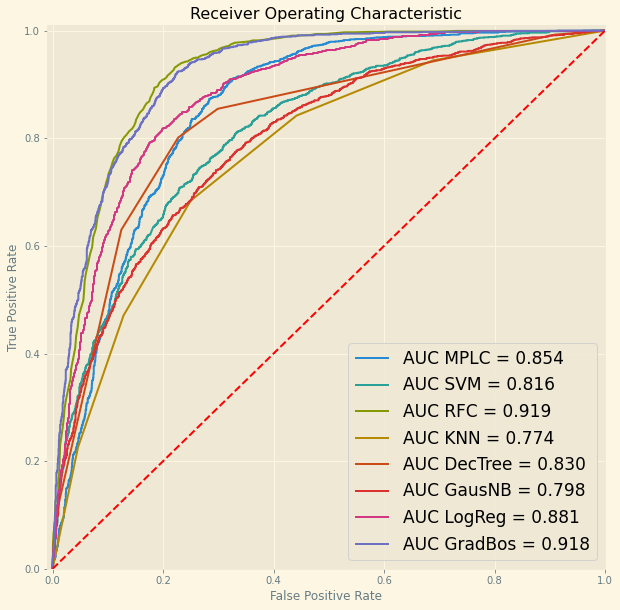

In [ ]:
from sklearn import metrics
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('Solarize_Light2')

y_pred_mplc_proba = mplc.predict_proba(X_test)
y_pred_svm_proba = svm.predict_proba(X_test)
y_pred_rfc_proba = rfc.predict_proba(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)
y_pred_dec_tree_proba = dec_tree.predict_proba(X_test)
y_pred_gau_nb_proba = gau_nb.predict_proba(X_test)
y_pred_log_reg_proba = log_reg.predict_proba(X_test)
y_pred_grad_bos_proba = grad_bos.predict_proba(X_test)

y_preds_mplc = y_pred_mplc_proba[:,1]
y_preds_svm = y_pred_svm_proba[:,1]
y_preds_rfc = y_pred_rfc_proba[:,1]
y_preds_knn = y_pred_knn_proba[:,1]
y_preds_dectree = y_pred_dec_tree_proba[:,1]
y_preds_gaunb = y_pred_gau_nb_proba[:,1]
y_preds_logreg = y_pred_log_reg_proba[:,1]
y_preds_gradbos = y_pred_grad_bos_proba[:,1]

fpr_mplc, tpr_mplc, threshold_mplc = metrics.roc_curve(y_test, y_preds_mplc)
roc_auc_mplc = metrics.auc(fpr_mplc, tpr_mplc)
fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_test, y_preds_svm)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
fpr_rfc, tpr_rfc, threshold = metrics.roc_curve(y_test, y_preds_rfc)
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)
fpr_knn, tpr_knn, threshold = metrics.roc_curve(y_test, y_preds_knn)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
fpr_dectree, tpr_dectree, threshold = metrics.roc_curve(y_test, y_preds_dectree)
roc_auc_dectree = metrics.auc(fpr_dectree, tpr_dectree)
fpr_gaunb, tpr_gaunb, threshold = metrics.roc_curve(y_test, y_preds_gaunb)
roc_auc_gaunb = metrics.auc(fpr_gaunb, tpr_gaunb)
fpr_logreg, tpr_logreg, threshold = metrics.roc_curve(y_test, y_preds_logreg)
roc_auc_logreg = metrics.auc(fpr_logreg, tpr_logreg)
fpr_gradbos, tpr_gradbos, threshold = metrics.roc_curve(y_test, y_preds_gradbos)
roc_auc_grabos = metrics.auc(fpr_gradbos, tpr_gradbos)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_mplc, tpr_mplc, label = 'AUC MPLC = %0.3f' % roc_auc_mplc)
plt.plot(fpr_svm, tpr_svm, label = 'AUC SVM = %0.3f' % roc_auc_svm)
plt.plot(fpr_rfc, tpr_rfc, label = 'AUC RFC = %0.3f' % roc_auc_rfc)
plt.plot(fpr_knn, tpr_knn, label = 'AUC KNN = %0.3f' % roc_auc_knn)
plt.plot(fpr_dectree, tpr_dectree, label = 'AUC DecTree = %0.3f' % roc_auc_dectree)
plt.plot(fpr_gaunb, tpr_gaunb, label = 'AUC GausNB = %0.3f' % roc_auc_gaunb)
plt.plot(fpr_logreg, tpr_logreg, label = 'AUC LogReg = %0.3f' % roc_auc_logreg)
plt.plot(fpr_gradbos, tpr_gradbos, label = 'AUC GradBos = %0.3f' % roc_auc_grabos)

plt.legend(loc = 4,prop={'size': 17})
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion

1. The result is stable that is for all model test (accuracy, precision, recall, cohen kappa, and F1 score), random forest classifier always gains the highest score among others classifiers. Also, the Cross Validation score of random forest classifier is the highest score too, so the model is not overfitting. Moreover, the AUC score of random forest is near to 1 which is very good, and very much slightly under the AUC score of gradient boosting model.
2. From decision tree, we obtain feature the most carry effect for term deposit of client, that is duration (last contact duration), then poutcame_success(outcome of the previous marketing campaign is success), contact_unknown(contact communication type), and housing(has housing loan or not). Therefore, the strategy for maximizing the number of client taking term deposit, is focus on that four features. This goes along with Pareto principle 80/20 which says that 20% of input is affect 80% of result, so we can take efficiency by focus on fewer features but gains the better results.